<a href="https://colab.research.google.com/github/lephuocdat2000/NhapmonCV/blob/master/%C3%94n%20t%E1%BA%ADp%20code%20histogram%20v%C3%A0%20filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<BarContainer object of 256 artists>

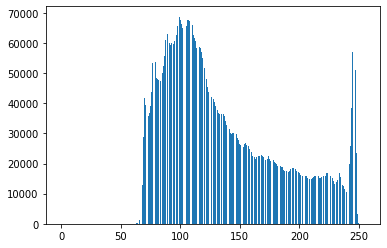

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_gray=cv2.imread('/content/1_XyOTKWqLq5X9ZT_xemeyTQ.png',0)
img_vec=img_gray.reshape(-1)
def cal_hist(img_vec):
   hist=np.zeros(256,np.int)
   values,counts=np.unique(img_vec,return_counts=True)
   for i,val in enumerate(values):
     hist[val]=counts[i]
   return hist
hist=cal_hist(img_vec)
plt.bar(range(0,256),hist)

In [50]:
filter=np.array([[1/9,1/9,1/9],
        [1/9,1/9,1/9],
        [1/9,1/9,1/9]])
def Filter(img_gray,filter):
  img_h,img_w = img_gray.shape[0],img_gray.shape[1] 
  f_h,f_w=filter.shape[0],filter.shape[1]
  result=np.zeros((img_h-f_h+1,img_w-f_w+1))
  for i in range(0,img_gray.shape[0]-f_h):
       j=0
       while(j<img_gray.shape[1]-f_w):
            temp=img_gray[i:(i+f_h),j:(j+f_w)].reshape(-1)
            result[i][j]=np.dot(temp,filter.reshape(-1))
            j+=1
  return result
result=Filter(img_gray,filter)
          

In [51]:
result

array([[186.33333333, 184.22222222, 182.11111111, ..., 244.        ,
        244.        ,   0.        ],
       [186.44444444, 184.55555556, 182.22222222, ..., 244.        ,
        244.        ,   0.        ],
       [186.22222222, 184.55555556, 182.22222222, ..., 244.        ,
        244.        ,   0.        ],
       ...,
       [119.22222222, 118.22222222, 117.11111111, ..., 118.        ,
        118.11111111,   0.        ],
       [120.44444444, 118.88888889, 117.22222222, ..., 118.77777778,
        119.44444444,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])